In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import string 

import nltk
from nltk.corpus import stopwords

from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('P6_P7_spam.csv',encoding='latin-1')

In [3]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
df=df[['v1','v2']]

In [5]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [6]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [7]:
df.columns=['label','message']

In [8]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [9]:
def processing_text(message):
    msg_nopunc=[c for c in message if c not in string.punctuation]
    msg_nopunc=''.join(msg_nopunc)
    return [w for w in msg_nopunc.split() if w.lower() not in stopwords.words('english')]

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
X_train,X_test,y_train,y_test=train_test_split(df['message'],df['label'],test_size=0.2,random_state=0)

In [12]:
bow_transformer=CountVectorizer(analyzer=processing_text).fit(X_train)
mess_trans=bow_transformer.transform(X_train)
tfidf_transformer=TfidfTransformer(use_idf=False)
mess_tfidf=tfidf_transformer.transform(mess_trans)

In [13]:
mess_bow1=bow_transformer.transform(X_test)
tfidf_transformer1=TfidfTransformer(use_idf=False)
mess_tfidf1=tfidf_transformer1.transform(mess_bow1)

In [25]:
print(mess_tfidf)

  (0, 5310)	0.3333333333333333
  (0, 5960)	0.3333333333333333
  (0, 6136)	0.6666666666666666
  (0, 6488)	0.3333333333333333
  (0, 7279)	0.3333333333333333
  (0, 9102)	0.3333333333333333
  (1, 1732)	0.4082482904638631
  (1, 2071)	0.4082482904638631
  (1, 5422)	0.4082482904638631
  (1, 7023)	0.4082482904638631
  (1, 8935)	0.4082482904638631
  (1, 9425)	0.4082482904638631
  (2, 830)	0.2886751345948129
  (2, 2892)	0.2886751345948129
  (2, 6107)	0.2886751345948129
  (2, 6641)	0.2886751345948129
  (2, 6812)	0.2886751345948129
  (2, 7063)	0.2886751345948129
  (2, 7510)	0.2886751345948129
  (2, 8092)	0.2886751345948129
  (2, 8618)	0.2886751345948129
  (2, 9328)	0.2886751345948129
  (2, 9394)	0.2886751345948129
  (2, 9545)	0.2886751345948129
  (3, 4726)	0.4082482904638631
  :	:
  (4454, 6685)	0.22941573387056174
  (4454, 7407)	0.22941573387056174
  (4454, 7417)	0.22941573387056174
  (4454, 7869)	0.22941573387056174
  (4454, 8026)	0.22941573387056174
  (4454, 8207)	0.22941573387056174
  (4454, 9

In [14]:
mnb=MultinomialNB()
mnb.fit(mess_tfidf,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [15]:
y_pred=mnb.predict(mess_tfidf1)

In [16]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        ham       0.94      1.00      0.97       949
       spam       1.00      0.64      0.78       166

avg / total       0.95      0.95      0.94      1115



In [17]:
cf_matrix=confusion_matrix(y_test,y_pred)

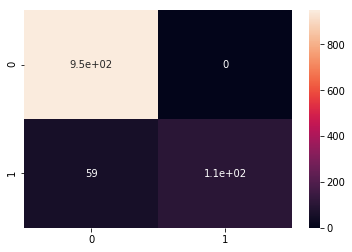

In [18]:
sns.heatmap(cf_matrix,annot=True)

In [19]:
print("Accuracy of the Naive Bayes Classifier is : ",accuracy_score(y_test,y_pred))

Accuracy of the Naive Bayes Classifier is :  0.947085201793722
